In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


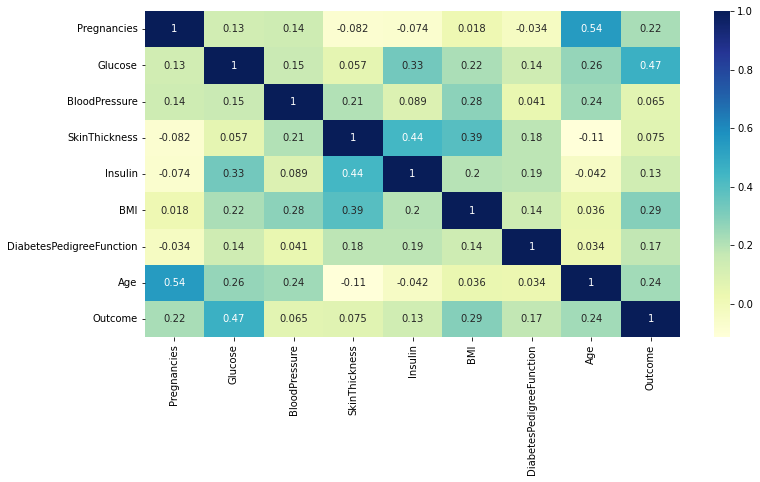

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [6]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X.shape, y.shape

((768, 8), (768,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100, shuffle=True)
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [10]:
# Build a random forest model. Get the best hyperparameters using GridSearchCV
rf = RandomForestClassifier(random_state=42)
params = {
    "max_depth": [3,5,6],
    "min_samples_leaf": [5,10,15,20,30],
    "n_estimators": [20,30,50,100],
    "max_features": [2,3,5]
}
grid_search = GridSearchCV(rf,
                          param_grid=params,
                          cv=4,
                          verbose=1,
                          n_jobs=-1,
                          scoring="accuracy")
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6], 'max_features': [2, 3, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'n_estimators': [20, 30, 50, 100]},
             scoring='accuracy', verbose=1)

In [11]:
best_rf = grid_search.best_estimator_
best_rf

RandomForestClassifier(max_depth=3, max_features=5, min_samples_leaf=10,
                       n_estimators=20, random_state=42)

In [12]:
imp_df = pd.DataFrame({
    "vars": X.columns,
    "imp": best_rf.feature_importances_
})
imp_df.sort_values(by="imp", ascending=False)

,vars,imp
1,Glucose,0.520024
5,BMI,0.167645
7,Age,0.144542
6,DiabetesPedigreeFunction,0.095591
0,Pregnancies,0.047341
4,Insulin,0.015661
2,BloodPressure,0.006897
3,SkinThickness,0.002297


In [13]:
y_test_pred = best_rf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

evaluate_model(best_rf)

Train Accuracy : 0.8212290502793296
Train Confusion Matrix:
[[317  33]
 [ 63 124]]
--------------------------------------------------
Test Accuracy : 0.7402597402597403
Test Confusion Matrix:
[[125  25]
 [ 35  46]]


In [26]:
import joblib
joblib.dump(best_rf,'diabetes.pkl')

['diabetes.pkl']

In [22]:
df2 = pd.read_csv("Book2.csv")

In [27]:
md=joblib.load('diabetes.pkl')

In [28]:
predict=md.predict(df2)

In [29]:
print(predict)

[1]
